In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
tqdm_notebook().pandas()
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [68]:
df = pd.read_pickle('../data/cleanAppleFiltered.pkl')

In [69]:
df = df.loc[df.date_x < datetime(2017, 11, 13)]

In [82]:
stop = ['really','want','always']

In [83]:
pat = r'\b(?:{})\b'.format('|'.join(stop))

In [84]:
pat

'\\b(?:really|want|always)\\b'

In [85]:
df['text_x'] = df['text_x'].str.replace(pat, '')

In [86]:
text = str(df.text_x)

In [ ]:
font_path = "/Library/Fonts/DIN Condensed Bold.ttf"

In [87]:
wc = WordCloud(background_color="white",max_words=20,max_font_size=60, relative_scaling=.5,
                          colormap='Dark2', scale=3, collocations=False)

In [88]:
wc.generate_from_text(text)

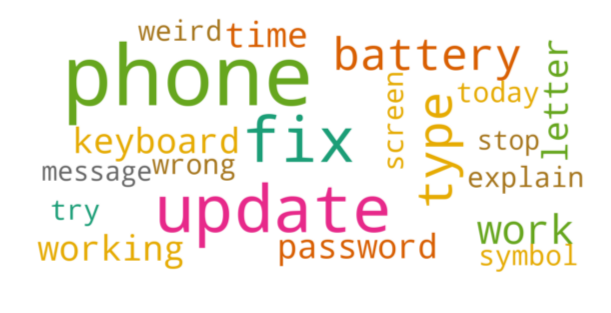

In [89]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(18)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('../presentation/wordcloud.svg')

In [20]:
wordcloud = WordCloud().generate(text)

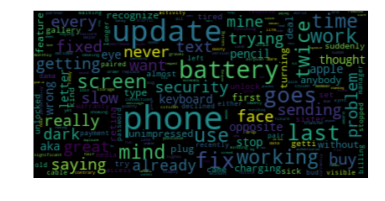

In [28]:
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
text_file = open("Output.txt", "w")
text_file.write(text)
text_file.close()